 # Introducción

El proyecto consiste en preparar un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.
El modelo debe predecir la cantidad de oro extraído del mineral de oro a partir de los datos de extracción y purificación.
El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

 # Tabla de contenidos

* [1- Preparación de los datos](#chapter1)
    * [1 - 1 Carga de datos](#section_1_1)
    * [1 - 2 Cálculo de recuperación](#section_1_2) 
    * [1 - 3 Características no disponibles en conjunto de prueba](#section_1_3)
    * [1 - 4 Procesamiento de datos](#section_1_4)
    
* [2 - Preparación de los datos](#chapter2)

    * [2 - 1 Concentracion de metales por etapa purificación](#section_2_1)
    * [2 - 2 Distribuciones del tamaño de particulas](#section_2_2) 
    * [2 - 3 Concentración de sustancias](#section_2_3) 
  
    
* [3- Entrenamiento y calculo de F1](#chapter3)

    * [3 - 1 Calculo de Smape](#section_3_1)
    * [3 - 2 Entrenamiento y seleccion del modelo](#section_3_2) 
    * [3 - 2 Comprobacieon de la calidad del modelo](#section_3_3) 
  
* [4- Conclusión](#chapter4)

## Preparación de los datos  <a class="anchor" id="chapter1"></a>

### Carga de datos <a class="anchor" id="section_1_1"></a>

In [3]:
# Importacion de librerias

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
#Se cargan los datos

data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
data_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [6]:
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [7]:
data_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


 - Los dataset presentan valores ausentes en casi todas sus columnas.
 - El dataset de test contiene solo 53 columnas de las 87 que tienen el conjunto completo y el de entrenamiento
 - Los datos "date' son del tipo objetc, deberian ser date time

### Cálculo de recuperación <a class="anchor" id="section_1_2"></a>

- De rougher:

C= rougher.output.concentrate_au 

F= rougher.input.feed_au 

T = rougher.output.tail_au  

- final:


C= final.output.concentrate_au 

F= rougher.output.concentrate_au 

T = final.output.tail_au

In [11]:
# Cálculo de recuperacion de rougher:
data_train['calc_recuperacion'] =(data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au'] ))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100



In [12]:
EAM = (abs(data_train['calc_recuperacion'] - data_train['rougher.output.recovery'])).sum()/(data_train['calc_recuperacion'].count())
print("EAM:", EAM)



EAM: 9.118330171473421e-15


- El error absoluto medio entre los valores de recuperacion calculados y los disponibles en el conjunto de entrenamiento es muy pequeño 

### Características no disponibles en conjunto de prueba <a class="anchor" id="section_1_3"></a>

In [13]:
train_col = data_train.columns
test_col = data_test.columns
col_ausentes = []
for i in train_col:
    if i not in test_col:
        col_ausentes.append(i)
        
print((col_ausentes))

print("Total de columnas ausentes en el conjunto de test", len(col_ausentes))

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

- El conjunto de test cuenta con 35 columnas menos que el conjunto de entrenamiento. Todos los valores son del tipo float



### Procesamiento de datos <a class="anchor" id="section_1_4"></a>

In [14]:
#verificación de duplicados
data_train.duplicated().sum()

0

In [15]:
#tratamiento de ausentes

#Se ordenadan los datos por fecha

data_train.sort_values(by ='date', ascending= True, inplace= True)



In [16]:
#Se rellenan ausentes con el valor mas cercano ordenado por fecha

data_train= data_train.fillna(method = "ffill")

In [17]:
#verificaicion de ausentes rellenados
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
calc_recuperacion                             0
Length: 88, dtype: int64

## Análisis de datos  <a class="anchor" id="chapter2"></a>

### Concentración de metales por etapa purificación <a class="anchor" id="section_2_1"></a>

In [18]:
#Antes de la purificación
total = data_train['rougher.output.concentrate_pb'].mean()+data_train['rougher.output.concentrate_ag'].mean()+data_train['rougher.output.concentrate_au'].mean()
print("Concentración AG %:", round(data_train['rougher.output.concentrate_ag'].mean()/total*100,1))
print("Concentración AU %:", round(data_train['rougher.output.concentrate_au'].mean()/total*100,1))
print("Concentración PB %:", round(data_train['rougher.output.concentrate_pb'].mean()/total*100,1))


Concentración AG %: 30.3
Concentración AU %: 49.9
Concentración PB %: 19.7


In [19]:
#Después de la primera etapa de la purificacion

total = data_train['primary_cleaner.output.concentrate_ag'].mean()+data_train['primary_cleaner.output.concentrate_au'].mean()+data_train['primary_cleaner.output.concentrate_pb'].mean()
print("Concentración AG %:", round(data_train['primary_cleaner.output.concentrate_ag'].mean()/total*100,1))
print("Concentración AU %:", round(data_train['primary_cleaner.output.concentrate_au'].mean()/total*100,1))
print("Concentración PB %:", round(data_train['primary_cleaner.output.concentrate_pb'].mean()/total*100,1))



Concentración AG %: 16.5
Concentración AU %: 64.6
Concentración PB %: 18.9


In [20]:
#Después de la segunda etapa de la purificacion

total = data_train['final.output.concentrate_ag'].mean()+data_train['final.output.concentrate_au'].mean()+data_train['final.output.concentrate_pb'].mean()
print("Concentración AG %:", round(data_train['final.output.concentrate_ag'].mean()/total*100,1))
print("Concentración AU %:", round(data_train['final.output.concentrate_au'].mean()/total*100,1))
print("Concentración PB %:", round(data_train['final.output.concentrate_pb'].mean()/total*100,1))





Concentración AG %: 8.8
Concentración AU %: 74.1
Concentración PB %: 17.1


<AxesSubplot:title={'center':'Concentración antes de la purificación'}>

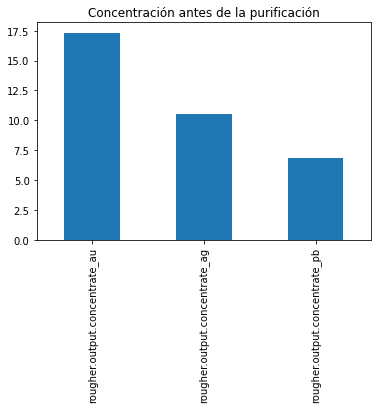

In [21]:
#Antes de la purificación

data_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].mean().plot(kind='bar', title = "Concentración antes de la purificación")
 
                                                                                                      
                                                                                                      
                                                                                                      
                                                                                                      

<AxesSubplot:title={'center':'Concentración después de la 1ra purificación'}>

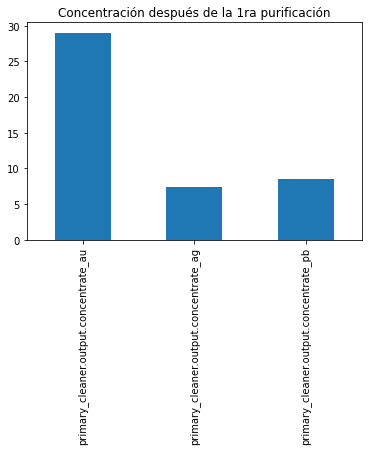

In [22]:
data_train[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']].mean().plot(kind='bar', title = "Concentración después de la 1ra purificación")






<AxesSubplot:title={'center':'Concentración antes de la 2da purificación'}>

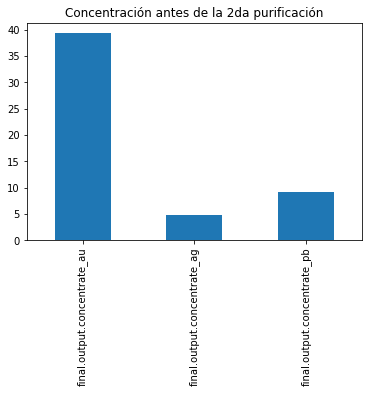

In [23]:
data_train[['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']].mean().plot(kind='bar', title = "Concentración antes de la 2da purificación")





 - La concentracion de Ag, a medida que avanazan las etapas de purificación, baja de 30% a 9% y la de oro sube de 50% a 74%. La de PB solo disminuye levenente

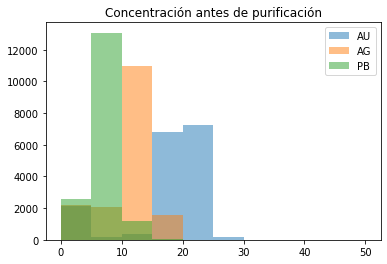

In [25]:
plt.hist(data_train['rougher.output.concentrate_au'], bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['rougher.output.concentrate_ag'], bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['rougher.output.concentrate_pb'], bins = 10, alpha = 0.5, range = (0,50))
plt.title('Concentración antes de purificación')
plt.legend(['AU', 'AG', 'PB'])
plt.show()

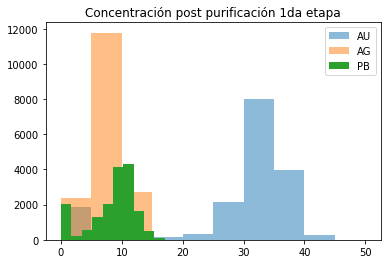

In [26]:
plt.title('Concentración post purificación 1da etapa')
plt.hist(data_train['primary_cleaner.output.concentrate_au'],bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['primary_cleaner.output.concentrate_ag'],bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['primary_cleaner.output.concentrate_pb'])
plt.legend(['AU', 'AG', 'PB'])
plt.show()

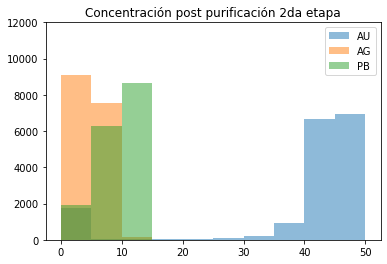

In [27]:

plt.hist(data_train['final.output.concentrate_au'],bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['final.output.concentrate_ag'],bins = 10, alpha = 0.5, range = (0,50))
plt.hist(data_train['final.output.concentrate_pb'], bins = 10, alpha = 0.5, range = (0,50))
plt.legend(['AU', 'AG', 'PB'])
plt.title('Concentración post purificación 2da etapa')
plt.ylim(0,12000)
plt.show()



### Distribuciones del tamaño de partículas <a class="anchor" id="section_2_2"></a>

<AxesSubplot:>

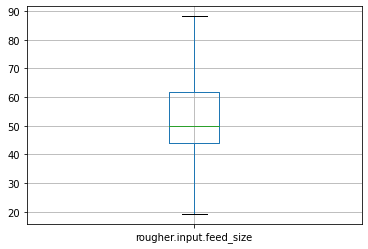

In [29]:
#Distribución del tamaño de particulas de la alimentación en el conjunto de prueba

data_test.boxplot(column= 'rougher.input.feed_size',  showfliers = False)

           
           
           

<AxesSubplot:>

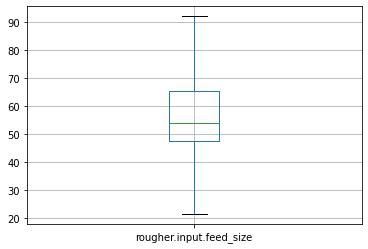

In [30]:
#Distribución del tamaño de particulas de la alimentación en el conjunto de entrenamiento
data_train.boxplot(column= 'rougher.input.feed_size', showfliers = False)

- La distribución del tamaño de partículas de la alimentación tiene una media levemente superior en el conjunto de entrenamiento respecto al de test. La distribucion de datos es similar en ambos conjuntos

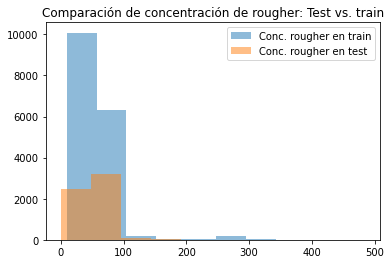

In [31]:

plt.hist(data_train['rougher.input.feed_size'], bins = 10, alpha = 0.5)
plt.hist(data_test['rougher.input.feed_size'], bins = 10, alpha = 0.5)
plt.legend(['Conc. rougher en train', 'Conc. rougher en test'])
plt.title('Comparación de concentración de rougher: Test vs. train')

plt.show()

### Concentración de sustancias <a class="anchor" id="section_2_3"></a>

<AxesSubplot:>

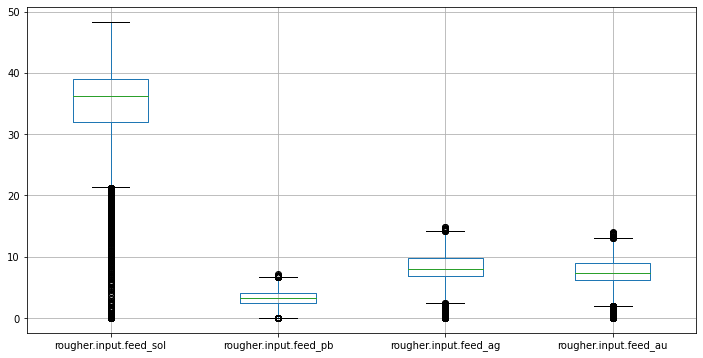

In [32]:
# concentracion de sustancias en materia conjunto de entrenamiento
data_train.boxplot(column = ['rougher.input.feed_sol', 'rougher.input.feed_pb','rougher.input.feed_ag','rougher.input.feed_au'], figsize=(12,6))


<AxesSubplot:>

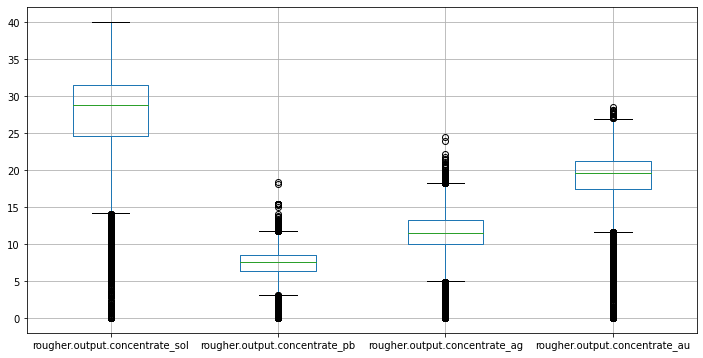

In [33]:
# concentracion de sustancias en el concentrado de rougher  conjunto de entrenamiento

data_train.boxplot(column = ['rougher.output.concentrate_sol','rougher.output.concentrate_pb','rougher.output.concentrate_ag','rougher.output.concentrate_au'], figsize=(12,6))




<AxesSubplot:>

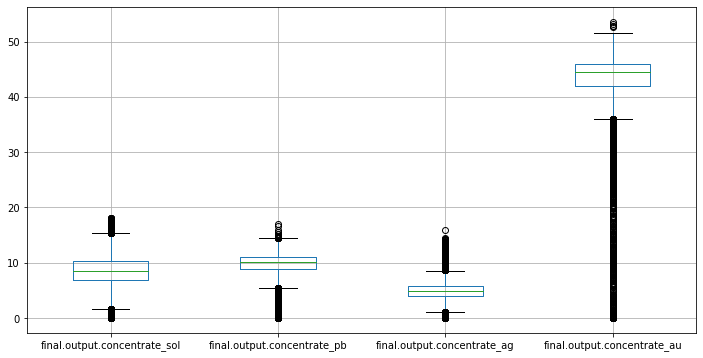

In [34]:
# concentracion de sustancias en el concentrado de final  conjunto de entrenaniento

data_train.boxplot(column = ['final.output.concentrate_sol','final.output.concentrate_pb','final.output.concentrate_ag','final.output.concentrate_au'], figsize=(12,6))



 - Los valores de concentracion de sustancias en el conjunto de entrenamiento presentan valores atipicos, deberan ser tratados en caso de que los modelos a utilizar asi lo requieran

## Construcción de modelo  <a class="anchor" id="chapter3"></a>

In [35]:
# Se tienen dos objetivos: roger.output.recovery y final.output.recovery. Dado que se trata de objetivos numericos se utilizaran 3 modelos de regresion: Desicion Tree Regressor, Random Forest Regressor y Linear Regression

# Se dividen los datos del train en features train y target train


### Calculo de SMAPE <a class="anchor" id="section_3_1"></a>

In [36]:
def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

In [37]:
#Se define una funcion para el calculo de smpae total a partir de la funcion de smape (para cada objetivo)

def smape_consol(y, y_pred):

    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]

    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1] #no se utiliza i.loc ya que recibira un array (no un df)

    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)

    return (0.25*smape_rougher + 0.75*smape_final)

### Entrenamiento y seleccion de modelo <a class="anchor" id="section3_2"></a>

In [38]:
#Se utiliza libreria sklearn para validacion cruzada 

#division de datos en features (se excluyen los datos ausentes en el conjunto de test y la fecha)

features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'calc_recuperacion'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

#escalado de caracteristicas

features_train_columns = list(features_train.columns)
scaler = StandardScaler()
scaler.fit(features_train)
features_train= scaler.transform(features_train)
features_train = pd.DataFrame(features_train, columns=features_train_columns) #formato



In [41]:
# Generación de scorer para validacion cruzada a partir de las funciones definidas para el cálculo de smpae

scorer={'smape':make_scorer(smape_consol,greater_is_better=False)}
  

In [43]:
# Inicializamos Modelo Arbol de decision y buscamos los parametros optimos

rfc = DecisionTreeRegressor(random_state=0)

# Definimos un diccionario de parametros a probar, en este caso
# para n_estimators se probaran los valores 200 y 500 y para
# max_depth los valores del 4 al 8. Se harán todas las combinaciones.
param_grid = { 
    'max_depth' : [4,5,6],
}

# Aplicamos gridSearchCV y aplicamos el mejor modelo en cuanto a hiperparametros.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(features_train, target_train)

# Vemos los parametros del modelo
CV_rfc.best_params_

{'max_depth': 5}

In [44]:
#Definicion del modelo de Arbol de decisión con el parametro optimo encontrado

model_decision_tree = DecisionTreeRegressor(random_state=0, max_depth = 5)

In [47]:
#Cálculo del score para modelo con metodo de cross validate

scores_decision_tree = cross_validate(model_decision_tree, features_train, target_train, cv=3,scoring=scorer)
scores_decision_tree

{'fit_time': array([0.45459962, 0.43828249, 0.4412508 ]),
 'score_time': array([0.00526881, 0.00478077, 0.00522041]),
 'test_smape': array([-15.64752761, -19.3193799 , -21.92797526])}

In [49]:

#Cálculo de score promedio del modelo Arbol de decisión

final_tree_scores = scores_decision_tree['test_smape'].sum()/(len(scores_decision_tree['test_smape']))
print('Score DecisionTreeRegressor:', abs(round(final_tree_scores,2)))

Score DecisionTreeRegressor: 18.96


In [69]:
# Inicializamos Modelo Random Forest y buscamos los parametros optimos

rfc = RandomForestRegressor(random_state=0)

# Definimos un diccionario de parametros a probar, en este caso
# para n_estimators se probaran los valores 200 y 500 y para
# max_depth los valores del 4 al 8. Se harán todas las combinaciones.
param_grid = { 
    'n_estimators': [10, 20, 30],
    'max_depth' : [5,6],
}

# Aplicamos gridSearchCV y aplicamos el mejor modelo en cuanto a hiperparametros.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(features_train, target_train)

# Vemos los parametros del modelo
CV_rfc.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [52]:
# Creación del modelo Random forest con los parametros optimos encontrados

model_random_forest = RandomForestRegressor(random_state=0, n_estimators = 10 , max_depth = 5)

In [53]:
scores_random_forest = cross_validate(model_random_forest, features_train, target_train, cv=3,scoring=scorer)
scores_random_forest

{'fit_time': array([2.7486732 , 2.64140964, 2.5710721 ]),
 'score_time': array([0.00770116, 0.00672579, 0.00689483]),
 'test_smape': array([-13.79509063, -14.32959292, -20.00441441])}

In [55]:

#Cálculo de score promedio del modelo random forest

final_random_forest_scores = scores_random_forest['test_smape'].sum()/(len(scores_random_forest['test_smape']))
print('Score random forest:', abs(round(final_random_forest_scores,2)))

Score random forest: 16.04


In [56]:
# Creación modelo Regresion lineal

model_linear_regresion = LinearRegression()

In [57]:
scores_linear_regression = cross_validate(model_linear_regresion, features_train, target_train, cv=3,scoring=scorer)
scores_linear_regression

{'fit_time': array([0.05045533, 0.16976094, 0.13031721]),
 'score_time': array([0.03538918, 0.0988729 , 0.06003499]),
 'test_smape': array([-16.58554655, -16.42486141, -21.96203438])}

In [59]:
final_linear_regression_scores = scores_linear_regression['test_smape'].sum()/(len(scores_linear_regression['test_smape']))
print('Score random forest:', abs(round(final_linear_regression_scores,2)))



Score random forest: 18.32



- El modelo de arbol de decisión cuenta con el mayor valor de Smape
- El modelos de bosque aleatorio cuenta con el menor valor de Smape y a su vez tiene mejor performance para el tratamiento de valores atipicos, por lo que se utilizara este mismo


### Comprobación del modelo <a class="anchor" id="section3_3"></a>

In [60]:
#Tratamiento de ausentes en el conjunto de test y full

In [61]:
data_test.sort_values(by ='date', ascending= True, inplace= True)

In [62]:
data_test = data_test.fillna(method = "ffill")

In [63]:
data_test.shape

(5856, 53)

In [64]:
data_full.sort_values(by ='date', ascending= True, inplace= True)

In [65]:
data_full = data_full.fillna(method = "ffill")

In [66]:
#Se toman los valores de target para el conjunto de test a partir de los indices (del conjunto completo)

lista_indices = data_test.index.values.tolist()

target_test= data_full.iloc[lista_indices]

target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]
                 

In [67]:
# se elimina la fecha de los features de test

features_test = data_test.drop(['date'], axis=1)

In [68]:

#Se entrena el mejor modelo seleccionado y de predicen los valores para features test, luego se calcula el smape

model_random_forest.fit(features_train, target_train)
features_valid = data_test.drop(['date'], axis=1)
predictions_best_model = model_random_forest.predict(features_test)
score_test = smape_consol(target_test, predictions_best_model) 
score_test

14.392645443298381

 - El error en el conjunto de test es levemente inferior al obtenido en el entrenamiento, por loq ue se comprueba la calidad del modelo

## Conclusiones  <a class="anchor" id="chapter4"></a>

- Los dataset presentan valores ausentes en casi todas sus columnas, los mismos se rellenan con el dato disponible, más cercano por fecha 
- El error absoluto medio entre los valores de recuperación calculados y los disponibles en el conjunto de entrenamiento es muy pequeño

- El conjunto de test cuenta con 35 columnas menos que el conjunto de entrenamiento, por ese motivo se procedió a eliminar dichas columnas ausentes en el conjunto de test, del conjunto de entrenamiento.

- La concentración de Ag, a medida que avanzan las etapas de purificación, baja de 30% a 9% y la de oro sube de 50% a 74%. La de PB solo disminuye levemente.

- La distribución del tamaño de partículas de la alimentación tiene una media levemente superior en el conjunto de entrenamiento respecto al de test. La distribución de datos es similar en ambos conjuntos.

- Los valores de concentración de sustancias en el conjunto de entrenamiento presentan valores atípicos, lo que se tuvo en cuenta a la hora de elegir el mejor modelo.

- Del análisis del smape para distintos modelos de regresión, surge que el modelo de árbol de decisión cuenta con el mayor valor de Smape, mientras que el modelo de bosque aleatorio cuenta con el menor valor de error y a su vez performa bien para valores atipicos. Se selecciona este ultimo para calcular las predicciones

- El error en el conjunto de test es levemente inferior al obtenido en el entrenamiento, por lo que se comprueba la calidad del modelo seleccionado.
